# 資料準備

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

C:\Users\user7\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [4]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [5]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

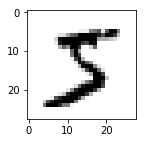

In [7]:
plot_image(x_train_image[0])

In [8]:
y_train_label[0]

5

In [9]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                    prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: 
        num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

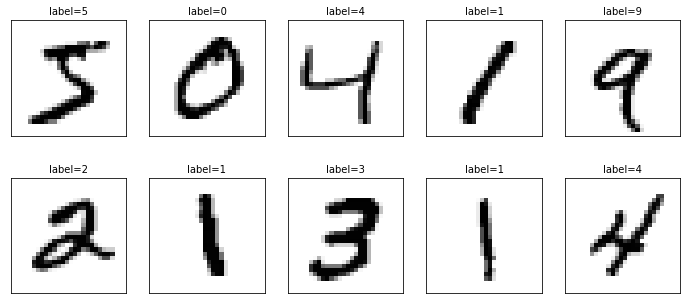

In [10]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [11]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


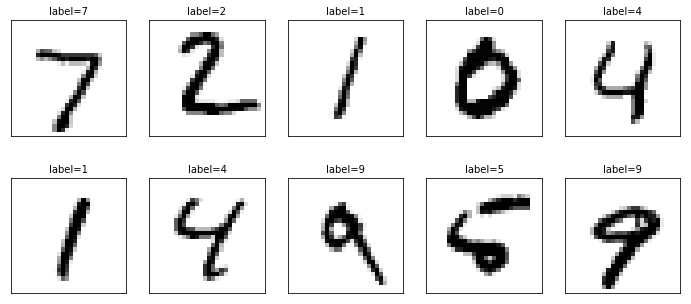

In [12]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

# 將images進行預處理

In [13]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [14]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [15]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [16]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [18]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# one hot encode outputs

In [19]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [21]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# 資料預處理

In [22]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [23]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [24]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [25]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [26]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [27]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()

In [29]:
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [30]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [31]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [33]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=0)

# 以圖形顯示訓練過程

In [34]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

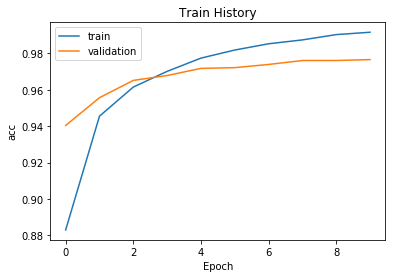

In [35]:
show_train_history(train_history,'acc','val_acc')

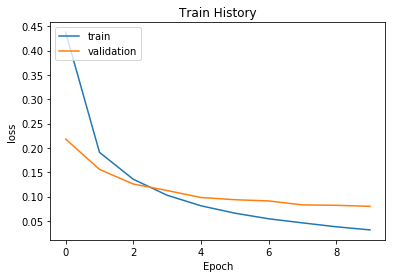

In [36]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [38]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 61us/step

accuracy= 0.9763


# 進行預測

In [39]:
prediction=model.predict_classes(x_Test)

In [40]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [41]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

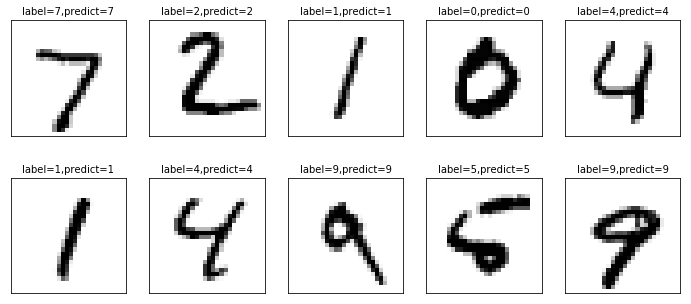

In [42]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0)

# confusion matrix

In [43]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,1,1,0,2,3,9,1
3,0,0,4,992,0,1,0,4,5,4
4,2,0,5,1,961,0,2,0,3,8
5,3,0,0,16,1,853,7,1,8,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,13,6,1,0,0,988,6,9
8,5,0,3,6,1,1,1,2,954,1


In [44]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [45]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3


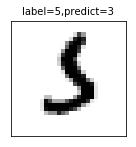

In [46]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

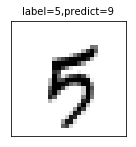

In [47]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

# 資料預處理

In [48]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [49]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [50]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [51]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [52]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [53]:
from keras.models import Sequential
from keras.layers import Dense

In [54]:
model = Sequential()

In [55]:
#將「輸入層」與「隱藏層」加入模型
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [56]:
#將「輸出層」加入模型
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [57]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [59]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 13s - loss: 0.2942 - acc: 0.9149 - val_loss: 0.1525 - val_acc: 0.9568
Epoch 2/10
 - 14s - loss: 0.1180 - acc: 0.9660 - val_loss: 0.1079 - val_acc: 0.9678
Epoch 3/10
 - 15s - loss: 0.0757 - acc: 0.9780 - val_loss: 0.0916 - val_acc: 0.9724
Epoch 4/10
 - 14s - loss: 0.0513 - acc: 0.9854 - val_loss: 0.0864 - val_acc: 0.9743
Epoch 5/10
 - 14s - loss: 0.0357 - acc: 0.9903 - val_loss: 0.0755 - val_acc: 0.9758
Epoch 6/10
 - 15s - loss: 0.0253 - acc: 0.9935 - val_loss: 0.0734 - val_acc: 0.9776
Epoch 7/10
 - 15s - loss: 0.0182 - acc: 0.9960 - val_loss: 0.0721 - val_acc: 0.9798
Epoch 8/10
 - 15s - loss: 0.0131 - acc: 0.9971 - val_loss: 0.0698 - val_acc: 0.9790
Epoch 9/10
 - 14s - loss: 0.0086 - acc: 0.9987 - val_loss: 0.0715 - val_acc: 0.9802
Epoch 10/10
 - 15s - loss: 0.0065 - acc: 0.9991 - val_loss: 0.0749 - val_acc: 0.9796


# 以圖形顯示訓練過程

In [60]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

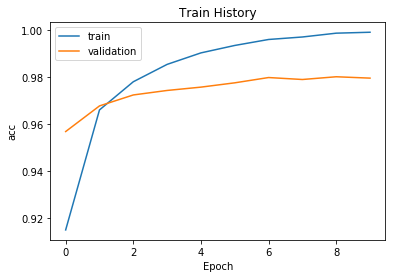

In [61]:
show_train_history(train_history,'acc','val_acc')

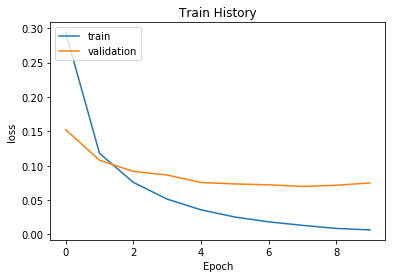

In [62]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [63]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 190us/step

accuracy= 0.9792


# 進行預測

In [64]:
prediction=model.predict_classes(x_Test)

In [65]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
             ",predict="+str(prediction[idx])
             ,fontsize=10)

        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

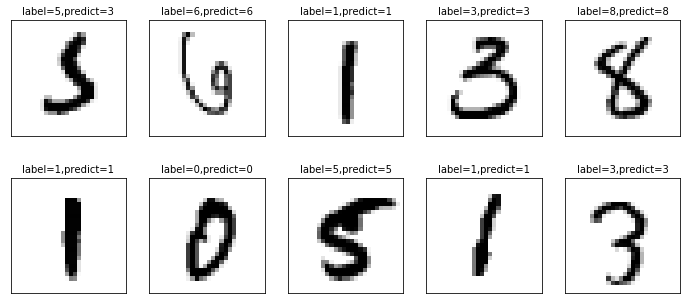

In [67]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [68]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,2,1,1,0,1,1,2,0
1,0,1128,2,1,0,0,1,1,2,0
2,2,1,1009,6,3,0,2,7,2,0
3,2,0,1,997,0,2,0,4,3,1
4,1,0,4,1,968,0,2,1,1,4
5,3,0,0,25,1,848,6,2,4,3
6,5,3,1,1,4,3,940,0,1,0
7,1,4,8,4,0,0,0,1009,2,0
8,3,0,4,13,5,0,1,3,943,2


In [69]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [70]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1082,5,3
1393,5,3
2035,5,3
2162,5,3
2291,5,3
2526,5,3
2597,5,3
2810,5,3


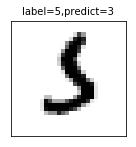

In [72]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340,num=1)

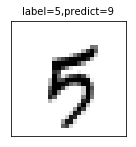

In [73]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

# 資料預處理

In [74]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [75]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [76]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [77]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [78]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [79]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [80]:
model = Sequential()

In [81]:
#將「輸入層」與「隱藏層」加入模型
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [82]:
model.add(Dropout(0.5))

In [83]:
#將「輸出層」加入模型
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [84]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [85]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [86]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 12s - loss: 0.3568 - acc: 0.8937 - val_loss: 0.1621 - val_acc: 0.9548
Epoch 2/10
 - 14s - loss: 0.1601 - acc: 0.9532 - val_loss: 0.1170 - val_acc: 0.9653
Epoch 3/10
 - 15s - loss: 0.1164 - acc: 0.9650 - val_loss: 0.0988 - val_acc: 0.9708
Epoch 4/10
 - 14s - loss: 0.0923 - acc: 0.9722 - val_loss: 0.0915 - val_acc: 0.9715
Epoch 5/10
 - 15s - loss: 0.0757 - acc: 0.9771 - val_loss: 0.0823 - val_acc: 0.9753
Epoch 6/10
 - 15s - loss: 0.0626 - acc: 0.9805 - val_loss: 0.0759 - val_acc: 0.9771
Epoch 7/10
 - 15s - loss: 0.0537 - acc: 0.9838 - val_loss: 0.0772 - val_acc: 0.9774
Epoch 8/10
 - 15s - loss: 0.0489 - acc: 0.9851 - val_loss: 0.0730 - val_acc: 0.9781
Epoch 9/10
 - 15s - loss: 0.0428 - acc: 0.9864 - val_loss: 0.0682 - val_acc: 0.9795
Epoch 10/10
 - 15s - loss: 0.0374 - acc: 0.9884 - val_loss: 0.0669 - val_acc: 0.9809


# 以圖形顯示訓練過程

In [87]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

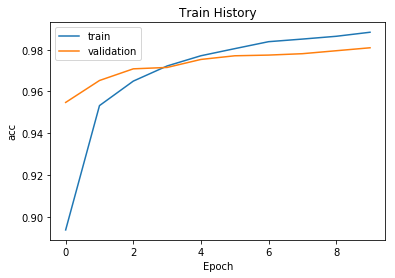

In [88]:
show_train_history(train_history,'acc','val_acc')

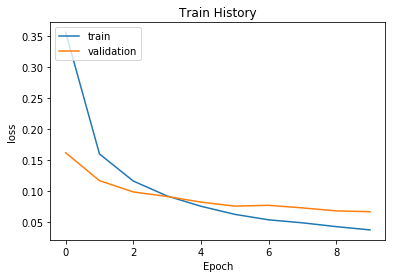

In [89]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [90]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 190us/step

accuracy= 0.9808


# 進行預測

In [91]:
prediction=model.predict_classes(x_Test)

In [92]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [93]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

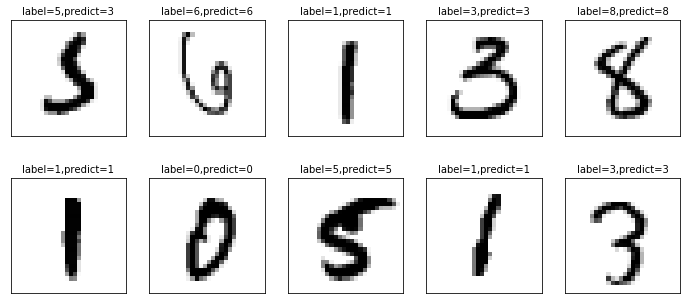

In [94]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [95]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,0,2,0,0,1,1,2,0
1,0,1126,3,1,0,0,2,0,3,0
2,6,1,1008,2,4,0,2,5,4,0
3,2,0,0,1000,0,1,0,3,3,1
4,0,0,4,0,971,0,0,0,2,5
5,4,0,0,15,1,861,5,0,5,1
6,5,2,0,1,9,3,935,0,3,0
7,2,5,8,1,0,0,0,1006,3,3
8,5,0,2,6,5,1,1,3,947,4


In [96]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [97]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3


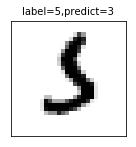

In [98]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

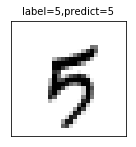

In [99]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

# 資料預處理

In [100]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [101]:
from keras.datasets import mnist

(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [102]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

#將「輸入層」與「隱藏層1」加入模型
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dropout(0.5))

#將「隱藏層2」加入模型
model.add(Dense(units=1000,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dropout(0.5))

#將「輸出層」加入模型
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [104]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [105]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 35s - loss: 0.3632 - acc: 0.8861 - val_loss: 0.1325 - val_acc: 0.9604
Epoch 2/10
 - 36s - loss: 0.1583 - acc: 0.9518 - val_loss: 0.1000 - val_acc: 0.9704
Epoch 3/10
 - 33s - loss: 0.1186 - acc: 0.9631 - val_loss: 0.0878 - val_acc: 0.9737
Epoch 4/10
 - 32s - loss: 0.0990 - acc: 0.9696 - val_loss: 0.0881 - val_acc: 0.9735
Epoch 5/10
 - 34s - loss: 0.0865 - acc: 0.9726 - val_loss: 0.0771 - val_acc: 0.9762
Epoch 6/10
 - 36s - loss: 0.0732 - acc: 0.9764 - val_loss: 0.0763 - val_acc: 0.9785
Epoch 7/10
 - 36s - loss: 0.0648 - acc: 0.9796 - val_loss: 0.0727 - val_acc: 0.9781
Epoch 8/10
 - 41s - loss: 0.0600 - acc: 0.9807 - val_loss: 0.0785 - val_acc: 0.9788
Epoch 9/10
 - 44s - loss: 0.0575 - acc: 0.9813 - val_loss: 0.0721 - val_acc: 0.9795
Epoch 10/10
 - 39s - loss: 0.0508 - acc: 0.9832 - val_loss: 0.0777 - val_acc: 0.9797


# 以圖形顯示訓練過程

In [106]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

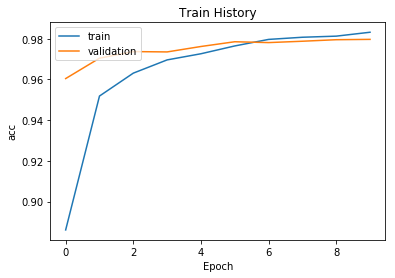

In [107]:
show_train_history(train_history,'acc','val_acc')

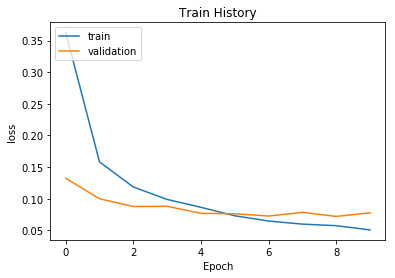

In [108]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [109]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 4s 422us/step

accuracy= 0.98


# 進行預測

In [110]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [111]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25:
        num=25
        
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

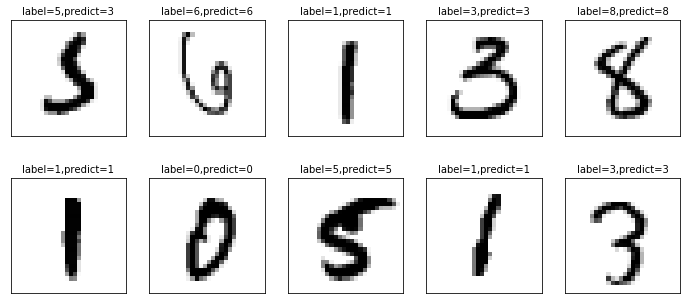

In [112]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [113]:
import pandas as pd 
pd.crosstab(y_test_label,prediction,
           rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,0,0,1,3,1,2,0
1,0,1127,4,0,0,1,2,0,1,0
2,3,1,1021,0,2,0,2,2,1,0
3,1,0,12,982,0,2,0,6,3,4
4,1,2,3,0,968,0,4,0,0,4
5,3,0,0,8,1,868,5,0,4,3
6,4,2,0,0,3,2,946,0,1,0
7,2,9,12,1,0,0,0,995,1,8
8,1,0,8,2,6,3,3,4,943,4


In [115]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction })
df[:2]

,label,predict
0,7,7
1,2,2


In [116]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2810,5,3
4271,5,3
4360,5,3
5937,5,3
5982,5,3


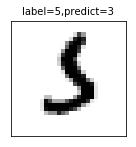

In [117]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

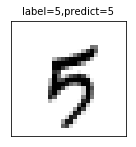

In [118]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

# 資料預處理

In [119]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)


# 建立模型

In [120]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
    
model.add(Dropout(0.5)) 

model.add(Dense(10,activation='softmax'))

In [121]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               225920    
__________

# 訓練模型

In [122]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [123]:
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 132s - loss: 0.4916 - acc: 0.8467 - val_loss: 0.0966 - val_acc: 0.9728
Epoch 2/20
 - 121s - loss: 0.1407 - acc: 0.9585 - val_loss: 0.0639 - val_acc: 0.9808
Epoch 3/20
 - 123s - loss: 0.1026 - acc: 0.9689 - val_loss: 0.0517 - val_acc: 0.9839
Epoch 4/20
 - 121s - loss: 0.0841 - acc: 0.9751 - val_loss: 0.0456 - val_acc: 0.9859
Epoch 5/20
 - 137s - loss: 0.0724 - acc: 0.9783 - val_loss: 0.0399 - val_acc: 0.9877
Epoch 6/20
 - 130s - loss: 0.0637 - acc: 0.9807 - val_loss: 0.0391 - val_acc: 0.9884
Epoch 7/20
 - 119s - loss: 0.0571 - acc: 0.9829 - val_loss: 0.0411 - val_acc: 0.9880
Epoch 8/20
 - 128s - loss: 0.0509 - acc: 0.9842 - val_loss: 0.0341 - val_acc: 0.9897
Epoch 9/20
 - 132s - loss: 0.0457 - acc: 0.9865 - val_loss: 0.0342 - val_acc: 0.9900
Epoch 10/20
 - 126s - loss: 0.0428 - acc: 0.9871 - val_loss: 0.0339 - val_acc: 0.9902
Epoch 11/20
 - 119s - loss: 0.0410 - acc: 0.9876 - val_loss: 0.0318 - val_acc: 0.9909
Epoch 12/20
 

In [124]:
import matplotlib.pyplot as plt

def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

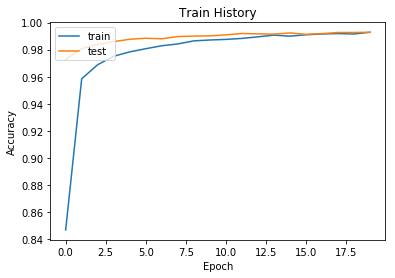

In [125]:
show_train_history('acc','val_acc')

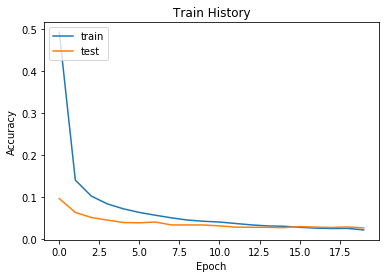

In [126]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [127]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 10s 1ms/step


0.9933

# 預測結果

In [128]:
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看預測結果

In [129]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25: num=25
    
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

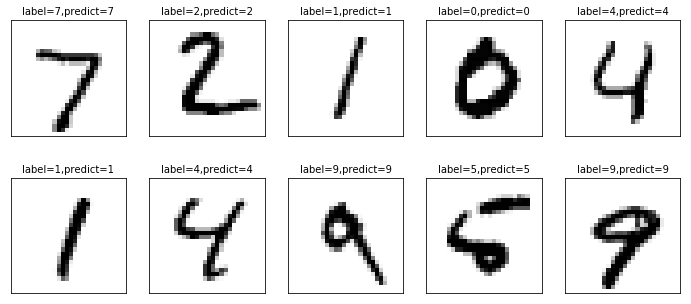

In [130]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [131]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,1,1,2,0
1,0,1131,1,1,0,1,1,0,0,0
2,2,0,1027,0,0,0,0,2,1,0
3,0,0,0,1003,0,4,0,1,2,0
4,0,0,0,0,978,0,0,0,2,2
5,0,0,0,3,0,888,1,0,0,0
6,2,2,0,0,1,1,952,0,0,0
7,0,3,2,1,0,0,0,1019,1,2
8,1,0,1,2,0,1,0,0,966,3


In [132]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [133]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
5937,5,3
